# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
merge_data["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data[merge_data[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_data.loc[merge_data["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_index = duplicate_data.index
mouse_df = merge_data.drop(duplicate_index)
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_groups = mouse_df.groupby(["Drug Regimen"])
mean_drug_groups = drug_groups["Tumor Volume (mm3)"].mean()
median_drug_groups = drug_groups["Tumor Volume (mm3)"].median()
var_drug_groups = drug_groups["Tumor Volume (mm3)"].var()
std_drug_groups = drug_groups["Tumor Volume (mm3)"].std()
sem_drug_groups = drug_groups["Tumor Volume (mm3)"].sem()


regimen_data = {"Mean Tumor Volume": mean_drug_groups, "Median Tumor Volume": median_drug_groups,
                "Tumor Volume Variance": var_drug_groups, "Tumor Volume Std. Dev.": std_drug_groups,
                "Tumor Volume Std. Error": sem_drug_groups}

regimen_df = pd.DataFrame(regimen_data)
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_stats = drug_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std","sem"])
agg_drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

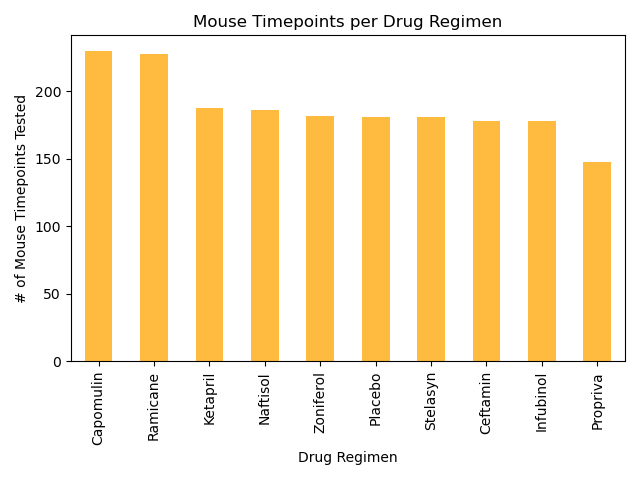

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = drug_groups["Timepoint"].count()
regimen_count= regimen_count.sort_values(ascending = False)

fig, ax = plt.subplots()
bar_chart = regimen_count.plot(kind = "bar", color = "orange", xlabel = "Drug Regimen", ylabel = "# of Mouse Timepoints Tested",
                   title = "Mouse Timepoints per Drug Regimen", alpha = .75)
fig.tight_layout()


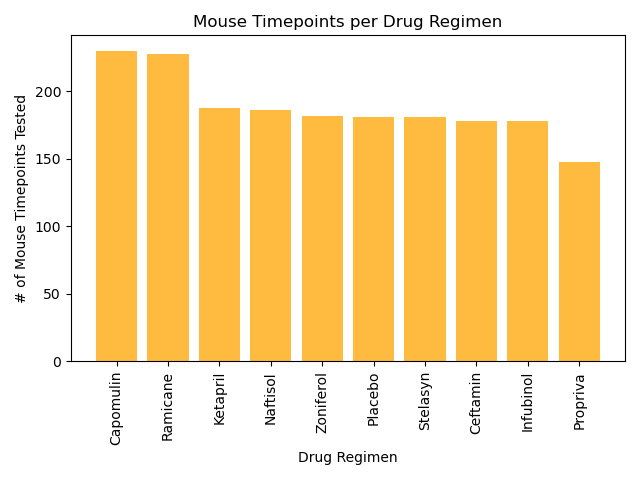

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(0,len(regimen_count)) + 1
y_axis = regimen_count.values
x_ticks = [value for value in x_axis]
xtick_label = regimen_count.index
fig, ax = plt.subplots()
ax.bar(x_axis,y_axis, color = "orange", alpha = .75)
ax.set_xticks(x_ticks, xtick_label, rotation = 90)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Mouse Timepoints Tested")
ax.set_title("Mouse Timepoints per Drug Regimen")
fig.tight_layout()


<Axes: title={'center': 'Sex of the Tested Mice'}, ylabel='Sex'>

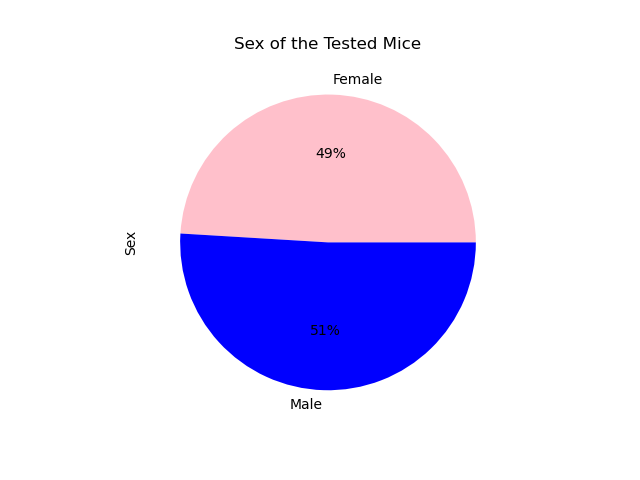

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_groups = mouse_df.groupby("Sex")["Sex"].count()
fig, ax = plt.subplots()
sex_groups.plot(kind = "pie", colors = ["pink", "blue"], autopct = "%1.0f%%", title = "Sex of the Tested Mice")


Text(0.5, 1.0, 'Sex of the Tested Mice')

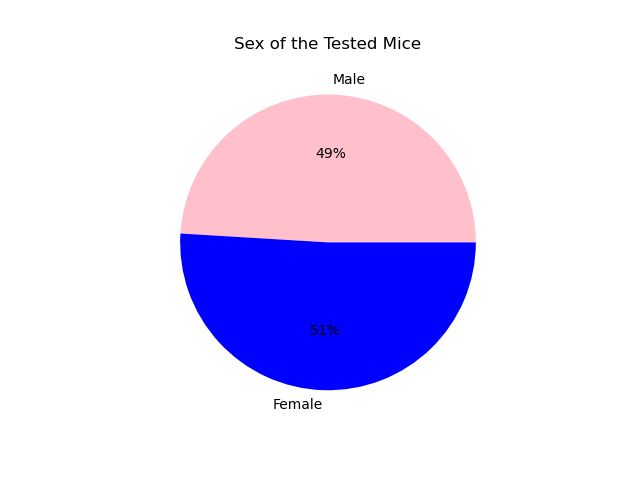

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = sex_groups.values
fig, ax = plt.subplots()
ax.pie(x = values, colors = ["pink", "blue"], autopct = "%1.0f%%", labels = ["Male", "Female"])
ax.set_aspect("equal")
ax.set_title("Sex of the Tested Mice")


## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = mouse_df.loc[mouse_df["Timepoint"] == 45]
last_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
 # Note: I dont think I need this step with the route I took

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

total_vol = []

for drug in treatments:
    for index, row in last_time.iterrows():
        if row["Drug Regimen"] == drug:
           total_vol.append(row["Tumor Volume (mm3)"])
total_vol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

cap = []
ram = []
inf = []
cef = []

for value in total_vol:
    for index, row in last_time.iterrows():
        if value == row["Tumor Volume (mm3)"] and row["Drug Regimen"] == "Capomulin":
            cap.append(value)
        elif value == row["Tumor Volume (mm3)"] and row["Drug Regimen"] == "Ramicane":
            ram.append(value)
        elif value == row["Tumor Volume (mm3)"] and row["Drug Regimen"] == "Infubinol":
            inf.append(value)
        elif value == row["Tumor Volume (mm3)"] and row["Drug Regimen"] == "Ceftamin":
            cef.append(value)

    
# add subset 

    
# Determine outliers using upper and lower bounds
lower_qrt_cap = np.percentile(cap,25)
upper_qrt_cap = np.percentile(cap,75)
iqr_cap =  upper_qrt_cap - lower_qrt_cap
upper_bound_cap =  upper_qrt_cap + (1.5 * iqr_cap) + upper_qrt_cap
lower_bound_cap = lower_qrt_cap - (1.5 * iqr_cap) 

lower_qrt_ram = np.percentile(ram,25)
upper_qrt_ram = np.percentile(ram,75)
iqr_ram =  upper_qrt_ram - lower_qrt_ram
upper_bound_ram = upper_qrt_cap + (1.5 * iqr_ram) 
lower_bound_ram = lower_qrt_ram - (1.5 * iqr_ram) 

lower_qrt_inf = np.percentile(inf,25)
upper_qrt_inf = np.percentile(inf,75)
iqr_inf =  upper_qrt_inf - lower_qrt_inf
upper_bound_inf =  upper_qrt_inf + (1.5 * iqr_inf) + upper_qrt_inf
lower_bound_inf = lower_qrt_inf - (1.5 * iqr_inf) 

lower_qrt_cef = np.percentile(cef,25)
upper_qrt_cef = np.percentile(cef,75)
iqr_cef =  upper_qrt_cef - lower_qrt_cef
upper_bound_cef = upper_qrt_cef + (1.5 * iqr_cef) + upper_qrt_cef
lower_bound_cef =  lower_qrt_cef - (1.5 * iqr_cef) 


outlier = False
for value in cap:
    if value > upper_bound_cap or value < lower_bound_cap:
        print(f" Capumilin has an outlier at this tumor volume: {value}")
        outlier = true
if not outlier: 
    print("Capumlin has no outliers")
for value in ram:
    if value > upper_bound_ram or value < lower_bound_ram:
        print(f" Ramicane has an outlier at this tumor volume: {value}")
for value in inf:
    if value > upper_bound_inf or value < lower_bound_inf:
        print(f" Infubinol has an outlier at this tumor volume: {value}")
for value in cef:
    if value > upper_bound_cef or value < lower_bound_cef:
        print(f"Ceftamin has an outlier at this tumor volume: {value}") 




Capumlin has no outliers


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
